In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib

In [190]:
# 정은님의 지하철 데이터

In [191]:
from glob import glob

file_list = glob("../data/MiniP2/seoul_subway_year_concat/*.csv")
file_list.sort()
file_list

['../data/MiniP2/seoul_subway_year_concat/subway_2017.csv',
 '../data/MiniP2/seoul_subway_year_concat/subway_2018.csv',
 '../data/MiniP2/seoul_subway_year_concat/subway_2019.csv',
 '../data/MiniP2/seoul_subway_year_concat/subway_2020.csv',
 '../data/MiniP2/seoul_subway_year_concat/subway_2021.csv',
 '../data/MiniP2/seoul_subway_year_concat/subway_2022.csv']

In [192]:
# 데이터를 합치자
dfs = []
for file_name in file_list:
    dfs.append(pd.read_csv(file_name))

In [193]:
df = pd.concat(dfs, ignore_index=True)
df

,Unnamed: 0,사용일자,노선명,역명,승차총승객수,하차총승객수
0,0,2017-01-01,2호선,봉천,11169.0,11198.0
1,1,2017-01-01,2호선,신림,40137.0,42005.0
2,2,2017-01-01,2호선,신대방,16033.0,16054.0
3,3,2017-01-01,2호선,구로디지털단지,28246.0,28497.0
4,4,2017-01-01,2호선,대림(구로구청),20946.0,21926.0
...,...,...,...,...,...,...
1237080,18177,2022-09-30,경춘선,춘천,2505.0,1722.0
1237081,18178,2022-09-30,공항철도 1호선,서울역,12725.0,11573.0
1237082,18179,2022-09-30,공항철도 1호선,공덕,2803.0,3699.0
1237083,18180,2022-09-30,공항철도 1호선,홍대입구,12609.0,13478.0


In [194]:
# 필요없는 열 제거 
df = df.drop(columns="Unnamed: 0")
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,2017-01-01,2호선,봉천,11169.0,11198.0
1,2017-01-01,2호선,신림,40137.0,42005.0
2,2017-01-01,2호선,신대방,16033.0,16054.0
3,2017-01-01,2호선,구로디지털단지,28246.0,28497.0
4,2017-01-01,2호선,대림(구로구청),20946.0,21926.0


In [195]:
# 연도와 월을 추출하기 위해 데이터 타입 변경
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237085 entries, 0 to 1237084
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   사용일자    1237085 non-null  object 
 1   노선명     1237085 non-null  object 
 2   역명      1237085 non-null  object 
 3   승차총승객수  1237085 non-null  float64
 4   하차총승객수  1237085 non-null  float64
dtypes: float64(2), object(3)
memory usage: 47.2+ MB


In [196]:
df["사용일자"] = pd.to_datetime(df["사용일자"])

In [197]:
# 잘 바뀜
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237085 entries, 0 to 1237084
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   사용일자    1237085 non-null  datetime64[ns]
 1   노선명     1237085 non-null  object        
 2   역명      1237085 non-null  object        
 3   승차총승객수  1237085 non-null  float64       
 4   하차총승객수  1237085 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 47.2+ MB


In [198]:
# 연도, 월 추출
df["연"] = df["사용일자"].dt.year
df["월"] = df["사용일자"].dt.month
df["연월"] = df["사용일자"].dt.strftime("%y-%m")
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,연,월,연월
0,2017-01-01,2호선,봉천,11169.0,11198.0,2017,1,17-01
1,2017-01-01,2호선,신림,40137.0,42005.0,2017,1,17-01
2,2017-01-01,2호선,신대방,16033.0,16054.0,2017,1,17-01
3,2017-01-01,2호선,구로디지털단지,28246.0,28497.0,2017,1,17-01
4,2017-01-01,2호선,대림(구로구청),20946.0,21926.0,2017,1,17-01
...,...,...,...,...,...,...,...,...
1237080,2022-09-30,경춘선,춘천,2505.0,1722.0,2022,9,22-09
1237081,2022-09-30,공항철도 1호선,서울역,12725.0,11573.0,2022,9,22-09
1237082,2022-09-30,공항철도 1호선,공덕,2803.0,3699.0,2022,9,22-09
1237083,2022-09-30,공항철도 1호선,홍대입구,12609.0,13478.0,2022,9,22-09


In [199]:
# 총 이용객 계산
df["총이용객"] = df["승차총승객수"] + df["하차총승객수"]
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,연,월,연월,총이용객
0,2017-01-01,2호선,봉천,11169.0,11198.0,2017,1,17-01,22367.0
1,2017-01-01,2호선,신림,40137.0,42005.0,2017,1,17-01,82142.0
2,2017-01-01,2호선,신대방,16033.0,16054.0,2017,1,17-01,32087.0
3,2017-01-01,2호선,구로디지털단지,28246.0,28497.0,2017,1,17-01,56743.0
4,2017-01-01,2호선,대림(구로구청),20946.0,21926.0,2017,1,17-01,42872.0


In [200]:
# 컬럼 재배치
df = df[['사용일자', '연월', '연', '월', '노선명', '역명', '승차총승객수', '하차총승객수', '총이용객']]
df.head()

,사용일자,연월,연,월,노선명,역명,승차총승객수,하차총승객수,총이용객
0,2017-01-01,17-01,2017,1,2호선,봉천,11169.0,11198.0,22367.0
1,2017-01-01,17-01,2017,1,2호선,신림,40137.0,42005.0,82142.0
2,2017-01-01,17-01,2017,1,2호선,신대방,16033.0,16054.0,32087.0
3,2017-01-01,17-01,2017,1,2호선,구로디지털단지,28246.0,28497.0,56743.0
4,2017-01-01,17-01,2017,1,2호선,대림(구로구청),20946.0,21926.0,42872.0


In [205]:
# 1호선, 동대문 추출 추출
df_test = df[(df["노선명"] == "1호선") & (df["역명"] == "동대문")]
df_test

,사용일자,연월,연,월,노선명,역명,승차총승객수,하차총승객수,총이용객
506,2017-01-01,17-01,2017,1,1호선,동대문,12256.0,13775.0,26031.0
778,2017-01-02,17-01,2017,1,1호선,동대문,12999.0,15888.0,28887.0
1401,2017-01-03,17-01,2017,1,1호선,동대문,14991.0,16866.0,31857.0
2142,2017-01-04,17-01,2017,1,1호선,동대문,15346.0,17498.0,32844.0
2613,2017-01-05,17-01,2017,1,1호선,동대문,15378.0,17401.0,32779.0
...,...,...,...,...,...,...,...,...,...
1234174,2022-09-26,22-09,2022,9,1호선,동대문,11397.0,10935.0,22332.0
1235231,2022-09-27,22-09,2022,9,1호선,동대문,11612.0,10921.0,22533.0
1235287,2022-09-28,22-09,2022,9,1호선,동대문,11659.0,10985.0,22644.0
1236118,2022-09-29,22-09,2022,9,1호선,동대문,11456.0,10680.0,22136.0


<AxesSubplot:xlabel='연월'>

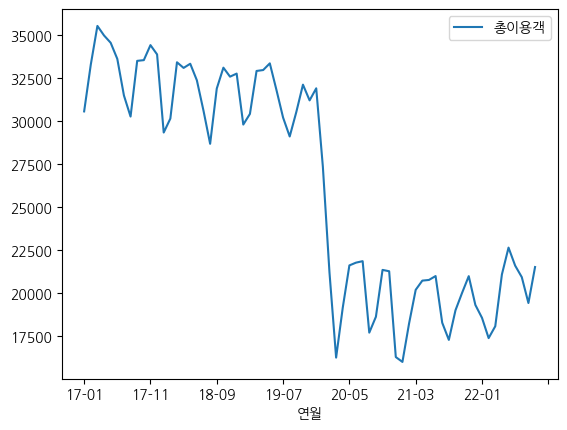

In [207]:
# 1호선 동대문역 이용객 추이
df_test.groupby(["연월"])[["총이용객"]].mean().plot()

In [182]:
# 연도, 월 단위 호선별, 지하철역 평균 이용객 수
dfg = df.groupby(["연월", "노선명", "역명"])[["총이용객"]].mean()
dfg

총이용객
연월    노선명 역명                
17-01 1호선 동대문   30568.903226
          동묘앞   18435.193548
          서울역  105879.451613
          시청    46624.451613
          신설동   28458.354839
...                      ...
22-09 중앙선 원덕      809.766667
          중랑    10576.466667
          지평      141.700000
          팔당     2234.333333
          회기    52771.500000

[41092 rows x 1 columns]

In [184]:
dfg.pivot_table(index="연월", columns=["노선명", "역명"], values="총이용객")

노선명             1호선                                                           \
역명              동대문           동묘앞            서울역            시청           신설동   
연월                                                                             
17-01  30568.903226  18435.193548  105879.451613  46624.451613  28458.354839   
17-02  33288.714286  20926.642857  114218.714286  58641.750000  31527.428571   
17-03  35544.870968  23019.225806  110060.935484  57050.032258  33447.161290   
17-04  34989.066667  23022.533333  106183.033333  50682.533333  32462.966667   
17-05  34564.096774  22202.870968  105711.225806  46103.483871  30313.032258   
...             ...           ...            ...           ...           ...   
22-05  22639.774194  19988.645161   88962.903226  41904.709677  25511.548387   
22-06  21590.666667  18258.433333   88527.300000  41319.533333  24546.033333   
22-07  20921.096774  17543.064516   87013.193548  41698.612903  24442.064516   
22-08  19415.064516  16337.838710   85527.774194  41291.161290  23157.870968   
22-09  21509.900000  18729.933333   89864.833333  43452.633333  24577.733333   

노선명                                                                          \
역명              제기동            종각          종로3가          종로5가  청량리(서울시립대입구)   
연월                                                                            
17-01  38771.741935  85685.838710  65311.225806  48450.903226  55494.483871   
17-02  39479.857143  97462.178571  73047.714286  56230.714286  57748.142857   
17-03  41867.354839  94474.451613  72086.741935  57592.161290  60456.580645   
17-04  40942.900000  88486.166667  68218.633333  54116.533333  58296.300000   
17-05  40145.032258  83050.741935  66025.193548  52500.129032  57539.290323   
...             ...           ...           ...           ...           ...   
22-05  33264.064516  63849.096774  48645.903226  43490.290323  39901.612903   
22-06  32434.966667  63452.700000  47739.700000  43243.866667  38321.166667   
22-07  31552.064516  64073.225806  46448.903226  41375.032258  37146.838710   
22-08  31276.419355  62813.258065  43999.387097  39735.419355  36266.193548   
22-09  33402.500000  63359.366667  47223.866667  42187.266667  38643.600000   

노선명    ...          중앙선                                                     \
역명     ...           양정           양평          오빈           용문          운길산   
연월     ...                                                                   
17-01  ...  1337.903226  6854.967742  612.129032  5093.741935  1486.548387   
17-02  ...  1479.000000  7416.428571  677.607143  5436.892857  1633.107143   
17-03  ...  1715.516129  7961.645161  729.903226  6209.354839  2087.967742   
17-04  ...  1821.400000  8663.933333  789.433333  7735.500000  2668.666667   
17-05  ...  1774.161290  8616.451613  789.903226  8042.935484  2503.870968   
...    ...          ...          ...         ...          ...          ...   
22-05  ...  1392.709677  6694.322581  686.064516  5357.806452  2300.193548   
22-06  ...  1312.133333  6320.166667  670.633333  4843.800000  2152.000000   
22-07  ...  1224.645161  6146.032258  631.741935  5032.322581  1644.387097   
22-08  ...  1190.451613  5862.193548  609.548387  4610.580645  1504.967742   
22-09  ...  1309.766667  6602.433333  648.600000  4797.633333  2000.566667   

노선명                                                                      
역명              원덕            중랑          지평           팔당            회기  
연월                                                                       
17-01   709.806452  10976.000000  103.909091  1426.225806  49808.354839  
17-02   758.785714  11794.214286   75.607143  1599.500000  56292.678571  
17-03   909.870968  12265.322581  117.000000  2062.645161  65327.032258  
17-04  1148.500000  12309.600000  114.433333  2627.033333  64092.366667  
17-05  1027.483871  12406.935484  120.935484  2671.064516  62238.129032  
...            ...           ...         ...          ...           ...  
22-05   901.3

In [165]:
pd.melt(dfg.unstack(["노선명", "역명"]).T, value_vars="연월")

,연월,value
0,22-09,21509.900000
1,22-09,18729.933333
2,22-09,89864.833333
3,22-09,43452.633333
4,22-09,24577.733333
...,...,...
638,22-09,4370.166667
639,22-09,13106.466667
640,22-09,4618.933333
641,22-09,5048.200000


In [83]:
df17[(df17["역명"] == "동대문") & (df17["노선명"] == "1호선")].groupby("월")["총이용객"].mean()

월
1     30568.903226
2     33288.714286
3     35544.870968
4     34989.066667
5     34564.096774
6     33625.966667
7     31496.677419
8     30268.870968
9     33511.433333
10    33553.419355
11    34427.500000
12    33886.903226
Name: 총이용객, dtype: float64